# Compare wake models

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from py_wake.examples.data.hornsrev1 import V80, Hornsrev1Site, wt9_x, wt9_y
from py_wake.wake_models import NOJ, BastankhahGaussian, Fuga
from py_wake.tests.test_files.fuga import LUT_path_2MW_z0_0_03

site = Hornsrev1Site()
windTurbines = V80()

wake_models = [('NOJ', NOJ(site, windTurbines, k=0.1)),
               ('Fuga', Fuga(LUT_path_2MW_z0_0_03, site, windTurbines)),
               ('BastankhahGaussian', BastankhahGaussian(site, windTurbines))]

**Calculate AEP**

In [49]:
from py_wake.aep_calculator import AEPCalculator

for name, wake_model in wake_models:
    aep_calc = AEPCalculator(wake_model)

    aep_gwh_ilk = aep_calc.calculate_AEP(x_i=[0,0], y_i=[0,-200])
    
    def fmt(l, v):
        print ("%-50s\t%-15s\t%-15s"%(l, str(v[0])[:12], str(v[1])[:12]))
    
    fmt(name, ['WT1','WT2'])
    fmt('AEP [GWh]:', aep_gwh_ilk.sum((1,2)))
    fmt('Average local effective wind speed [m/s]:', aep_calc.WS_eff_ilk.mean((1,2)))
    fmt('local effective wind speed, wd=0deg, ws=10m/s [m/s]:', aep_calc.WS_eff_ilk[:,0,7])
    fmt('Power, wd=0deg, ws=10m/s [kW]:', aep_calc.power_ilk[:,0,7]/1000)
    fmt('Thrust coefficient, wd=0deg, ws=10m/s [kW]:', aep_calc.ct_ilk[:,0,7])
    print ()


NOJ                                               	WT1            	WT2            
AEP [GWh]:                                        	9.0064893760   	9.1794854262   
Average local effective wind speed [m/s]:         	13.900751327   	13.900751327   
local effective wind speed, wd=0deg, ws=10m/s [m/s]:	10.0           	7.5776556739   
Power, wd=0deg, ws=10m/s [kW]:                    	1341.0         	596.32673905   
Thrust coefficient, wd=0deg, ws=10m/s [kW]:       	0.793          	0.8055776556   

Fuga                                              	WT1            	WT2            
AEP [GWh]:                                        	9.0490388105   	9.2005889867   
Average local effective wind speed [m/s]:         	13.907948898   	13.907948898   
local effective wind speed, wd=0deg, ws=10m/s [m/s]:	10.0           	7.3881578923   
Power, wd=0deg, ws=10m/s [kW]:                    	1341.0         	551.60526260   
Thrust coefficient, wd=0deg, ws=10m/s [kW]:       	0.793          	0.8053881578   

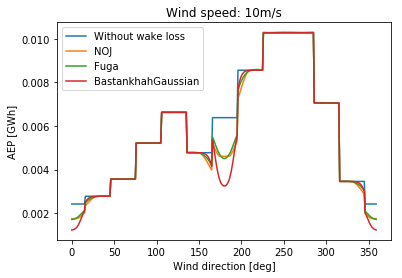

In [43]:
from py_wake.aep_calculator import AEPCalculator

site = Hornsrev1Site()
aep_gwh_noloss_ilk = aep_calc.calculate_AEP_no_wake_loss(x_i=[0,0], y_i=[0,-200])
plt.plot(aep_gwh_noloss_ilk[:,:,7].sum(0), label='Without wake loss')
    

for name, wake_model in wake_models:
    aep_calc = AEPCalculator(wake_model)
    aep_gwh_ilk = aep_calc.calculate_AEP(x_i=[0,0], y_i=[0,-200])

    # AEP pr wind direction
    plt.plot(aep_gwh_ilk[:,:,7].sum(0), label=name)
    plt.title('Wind speed: 10m/s')
    plt.xlabel('Wind direction [deg]')
    plt.ylabel('AEP [GWh]')
    plt.legend()

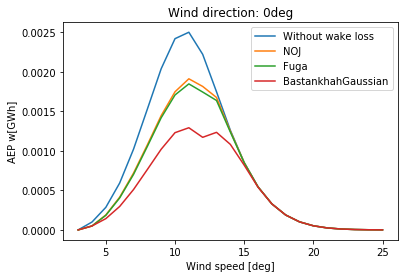

In [44]:
from py_wake.aep_calculator import AEPCalculator

site = Hornsrev1Site()
aep_gwh_noloss_ilk = aep_calc.calculate_AEP_no_wake_loss(x_i=[0,0], y_i=[0,-00])
plt.plot(site.default_ws, aep_gwh_noloss_ilk[:,0].sum(0), label='Without wake loss')

for name, wake_model in wake_models:
    aep_calc = AEPCalculator(wake_model)

    aep_gwh_ilk = aep_calc.calculate_AEP(x_i=[0,0], y_i=[0,-200])

    # AEP pr wind speed
    plt.plot(site.default_ws, aep_gwh_ilk[:,0].sum(0), label=name)
    plt.title('Wind direction: 0deg')
    plt.xlabel('Wind speed [deg]')
    plt.ylabel('AEP [GWh]')
    plt.legend()

**Wake map**

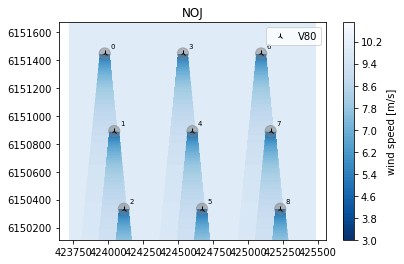

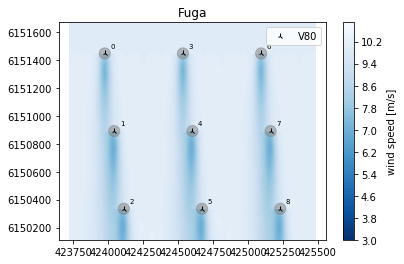

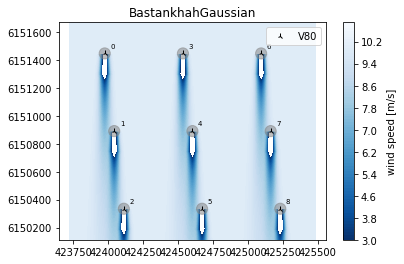

In [45]:
import matplotlib.pyplot as plt
x,y = wt9_x, wt9_y
for name, wake_model in wake_models:
    aep_calc = AEPCalculator(wake_model)
    plt.figure()
    plt.title(name)
    aep_calc.plot_wake_map(wt_x=x, wt_y=y, wd=[0], ws=[10], levels=np.arange(3,11,.1))
    windTurbines.plot(x, y)
